# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate, KFold

question - how often mental health related issues interfer with work?
given different resources(eduction, benefits, counseling, workfrom home) companies provide 

Work interference - If you have a mental health condition, do you feel that it interferes with your work?



# EDA

In [2]:
df = pd.read_csv('data.csv')
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [3]:
#Dropping columns not necessary for data analysis
df.drop(['Timestamp', 'comments', 'state', 'Country', 'phys_health_interview', 'phys_health_consequence'],
        axis=1, inplace=True)


#Dropping nan values and changing age column to intg.
df.work_interfere.dropna(inplace=True)
df.self_employed.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)


In [4]:
# creating a uniform values for vairous unique gender values

df['Gender'] = df['Gender'].replace({'f':'F'})
df['Gender'] = df['Gender'].replace({'female':'F'})
df['Gender'] = df['Gender'].replace({'Male':'M'})
df['Gender'] = df['Gender'].replace({'male':'M'})
df['Gender'] = df['Gender'].replace({'Female':'F'})
df['Gender'] = df['Gender'].replace({'m':'M'})
df['Gender'] = df['Gender'].replace({'Make':'M'})
df['Gender'] = df['Gender'].replace({'Woman':'F'})
df['Gender'] = df['Gender'].replace({'Man':'M'})
df['Gender'] = df['Gender'].replace({'Femake':'F'})
df['Gender'] = df['Gender'].replace({'Malr':'M'})
df['Gender'] = df['Gender'].replace({'Mail':'M'})
df['Gender'] = df['Gender'].replace({'femail':'F'})
df['Gender'] = df['Gender'].replace({'Female ':'F'})
df['Gender'] = df['Gender'].replace({'Female (trans)':'trans'})
df['Gender'] = df['Gender'].replace({'Trans-female':'trans'})
df['Gender'] = df['Gender'].replace({'Trans woman':'trans'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'cis-female/femme':'F'})
df['Gender'] = df['Gender'].replace({'cis male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Man':'M'})
df['Gender'] = df['Gender'].replace({'maile':'M'}) 
df['Gender'] = df['Gender'].replace({'Mal':'M'})
df['Gender'] = df['Gender'].replace({'Cis Female':'F'})
df['Gender'] = df['Gender'].replace({'woman':'F'})
df['Gender'] = df['Gender'].replace({'Female (cis)':'F'})
df['Gender'] = df['Gender'].replace({'Male ':'M'})
df['Gender'] = df['Gender'].replace({'Male (CIS)':'M'})
df['Gender'] = df['Gender'].replace({'msle':'M'})
df['Gender'] = df['Gender'].replace({'queer/she/they':'queer'})
df['Gender'] = df['Gender'].replace({'queer':'queer'})
df['Gender'] = df['Gender'].replace({'Genderqueer':'queer'})
df['Gender'] = df['Gender'].replace({'fluid':'queer'})
df['Gender'] = df['Gender'].replace({'non-binary':'queer'})
df['Gender'] = df['Gender'].replace({'Androgyne':'queer'})
df['Gender'] = df['Gender'].replace({'male leaning androgynous':'queer'})
df['Gender'] = df['Gender'].replace({'Agender':'queer'})
df['Gender'] = df['Gender'].replace({'something kinda male?':'other'})
df['Gender'] = df['Gender'].replace({'Nah':'other'})
df['Gender'] = df['Gender'].replace({'Agender':'other'})
df['Gender'] = df['Gender'].replace({'Neuter':'other'})
df['Gender'] = df['Gender'].replace({'p':'other'})
df['Gender'] = df['Gender'].replace({'Guy (-ish) ^_^':'other'})
df['Gender'] = df['Gender'].replace({'Male-ish':'other'})
df['Gender'] = df['Gender'].replace({'A little about you':'other'})
df['Gender'] = df['Gender'].replace({'Enby':'other'})
df['Gender'] = df['Gender'].replace({'All':'other'})
df['Gender'] = df['Gender'].replace({'ostensibly male, unsure what that really means':'other'})



df['work_interfere'] = df['work_interfere'].replace({'Sometimes': 'yes'})
df['work_interfere'] = df['work_interfere'].replace({'Often': 'yes'})
df['work_interfere'] = df['work_interfere'].replace({'Rarely': 'no'})
df['work_interfere'] = df['work_interfere'].replace({'Never': 'no' })

In [5]:
#consoldating two employee sizes

df['no_employees'] = df['no_employees'].replace({'1-5':'1-25'})
df['no_employees'] = df['no_employees'].replace({'6-25':'1-25'})

In [6]:
df.self_employed.dropna(axis=0, inplace=True)
#df.self_employed.isna().sum()

In [7]:
#Dropping all null values in df
df.dropna(inplace=True)

In [8]:
#Replacing unique(incorrectly entered age values with 1 in order to change it with the mean after)
for age in df.Age.values:
    if age <= 17 or age >= 80:
        df.Age.replace(age, 1, inplace=True)
        

In [9]:
#changing ones with the column mean and rounding it in to two 
df['Age'] = df['Age'].replace({1:df.Age.mean()})
df.Age = df.Age.round(2)

In [10]:
df.Age.mean()

32.30569089048107

No handles with labels found to put in legend.


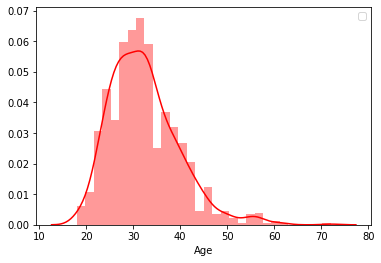

In [11]:
#Age distribution plot
y = df.Age
plt.figure(figsize=(6, 4))
sns.distplot(y, color='r')
plt.title=('Age Distribution')
plt.xlabel=('Age of Employees')
labels= 32
plt.legend()


In [12]:
#Target and independent variables

X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

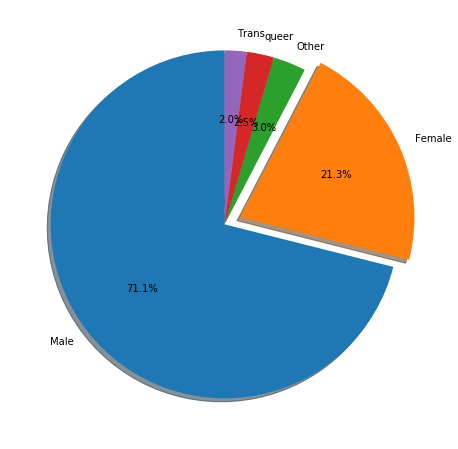

In [13]:
sizes = [700, 210, 30, 25, 20]
plt.figure(figsize=(8,8))
plt.pie(sizes, labels = ['Male', 'Female', 'Other', 'queer','Trans'], explode= (0, 0.1, 0, 0, 0), 
        shadow=True, startangle=90, autopct='%1.1f%%',
)

plt.show()

# One Hot Encoding

In [14]:
cont = X.select_dtypes(exclude='object')

cat = X.select_dtypes(include='object')

In [19]:
ohe = OneHotEncoder(drop='first')
train = ohe.fit_transform(cat).toarray()
train_df= pd.DataFrame(train, columns=ohe.get_feature_names(cat.columns))
train_df.head(2)

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,mental_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
train_df.reset_index(inplace=True, drop='first')

In [21]:
cont.reset_index(inplace=True, drop='first')

In [22]:
X = train_df.join(cont)

# Creating training and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

# SMOTE

SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [24]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=28)
X_sampled, y_sampled = sm.fit_sample(X_train, y_train)
y_sampled.value_counts()

no     478
yes    478
Name: work_interfere, dtype: int64

# Random Forest

In [25]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=28, max_depth=5)

forest_model= forest.fit(X_sampled, y_sampled)

In [27]:
print(forest_model.score(X_sampled, y_sampled))
print(forest_model.score(X_test, y_test))

0.8043933054393305
0.7040816326530612


In [28]:
df_features = pd.DataFrame(X_sampled.columns)
df_features['feature_importances'] = forest_model.feature_importances_
df_features.columns = ['features', 'feature_importances']

df_features = df_features.sort_values(by='feature_importances', ascending=False)

df_features.sort_values('features')
df_features.reset_index(drop='first', inplace=True)

In [29]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

In [30]:
print(cross_val_score(forest_model, X_sampled, y_sampled, scoring='accuracy', cv = 3).mean()*100)


75.11287238027643


# Confusion Matrix

In [870]:
pred = forest_model.predict(X_test)

#Confusion matrix and classification report

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 38  36]
 [ 22 100]]
              precision    recall  f1-score   support

          no       0.63      0.51      0.57        74
         yes       0.74      0.82      0.78       122

    accuracy                           0.70       196
   macro avg       0.68      0.67      0.67       196
weighted avg       0.70      0.70      0.70       196



In [871]:
print(accuracy_score(y_test, pred) * 100)

70.40816326530613


In [872]:
forest_conf = confusion_matrix(y_test, pred)
forest_conf

array([[ 38,  36],
       [ 22, 100]])

In [873]:
confusion_matrix(y_test, pred)

array([[ 38,  36],
       [ 22, 100]])

In [874]:
forest_classes = forest_model.classes_
forest_classes

array(['no', 'yes'], dtype=object)

In [875]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
    
    return fig

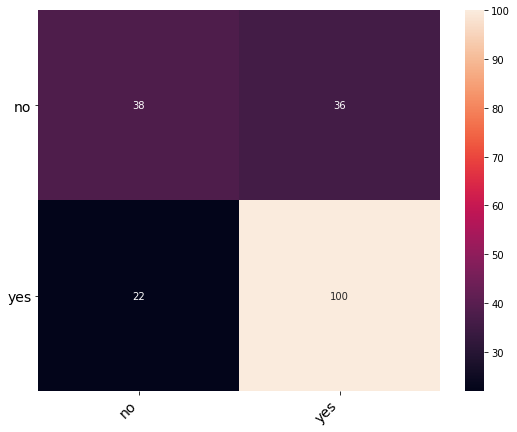

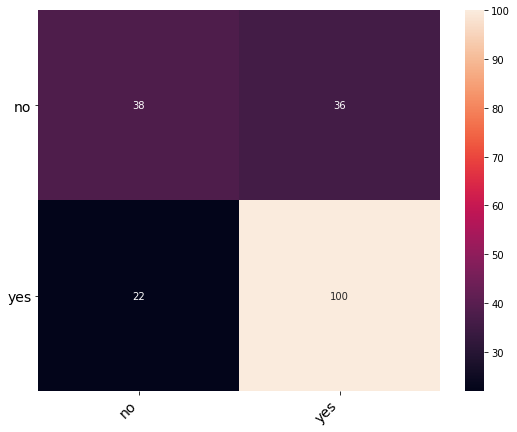

In [876]:
print_confusion_matrix(forest_conf, forest_classes, figsize =(9,7), fontsize=14)

In [877]:
# TP FP
# FP. TN

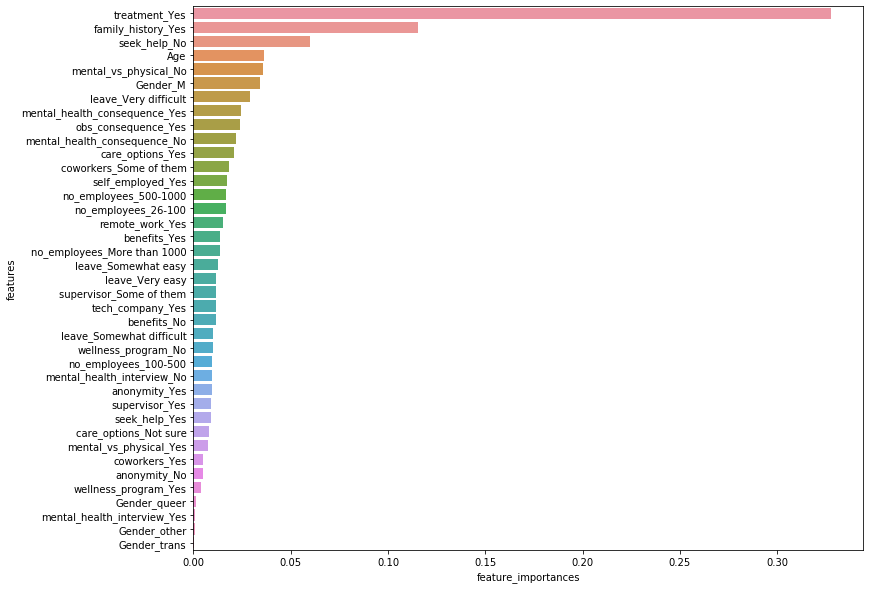

In [878]:
m = df_features.features
b = df_features.feature_importances
plt.figure(figsize=(12, 10))
sns.barplot(b, m)

# Tree classifier 

In [879]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_model = tree_clf.fit(X_sampled, y_sampled)

In [880]:
classes = tree_model.classes_

In [881]:
tree_model.score(X_sampled, y_sampled)

0.803347280334728

In [882]:
pred = tree_model.predict(X_test)


In [796]:
#print_confusion_matrix(cnf_matrix, class_names, figsize =(10,7), fontsize=14)

In [797]:
pred = tree_model.predict(X_test)

#Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[45 29]
 [31 91]]
              precision    recall  f1-score   support

          no       0.59      0.61      0.60        74
         yes       0.76      0.75      0.75       122

    accuracy                           0.69       196
   macro avg       0.68      0.68      0.68       196
weighted avg       0.70      0.69      0.69       196



# Logistic Regression 

In [902]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e12, solver='liblinear', random_state=28)

log_model = logreg.fit(X_sampled, y_sampled)

In [903]:
log_model.score(X_sampled, y_sampled)

0.7364016736401674

In [904]:
log_coef = log_model.coef_.reshape(-1)


In [905]:
df_coef = pd.DataFrame(log_coef, X_sampled.columns)

In [906]:
df_coef.head()

,0
Gender_M,0.028715
Gender_other,0.567355
Gender_queer,-0.533171
Gender_trans,5.844791
self_employed_Yes,0.323142


In [907]:
pred = log_model.predict(X_test)


In [908]:
print(accuracy_score(y_test, pred) * 100)

69.38775510204081


# Ada Boost

In [915]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50)

In [916]:
boost_model = abc.fit(X_sampled, y_sampled)

In [917]:
boost_model.score(X_sampled, y_sampled)

0.7803347280334728

In [918]:
boost_features = boost_model.feature_importances_
boost_columns = X_sampled.columns

In [919]:
boost_df = pd.DataFrame(boost_columns)
boost_df['features importances'] = boost_features
boost_df.columns = ['features', 'features_importances']

boost_df = boost_df.sort_values(by='features_importances', ascending=False)
boost_df = boost_df.reset_index(drop='first')
boost_df.head()

,features,features_importances
0,treatment_Yes,0.12
1,mental_vs_physical_No,0.12
2,seek_help_No,0.08
3,Age,0.08
4,supervisor_Some of them,0.06


Text(0, 0.5, 'Indicators')

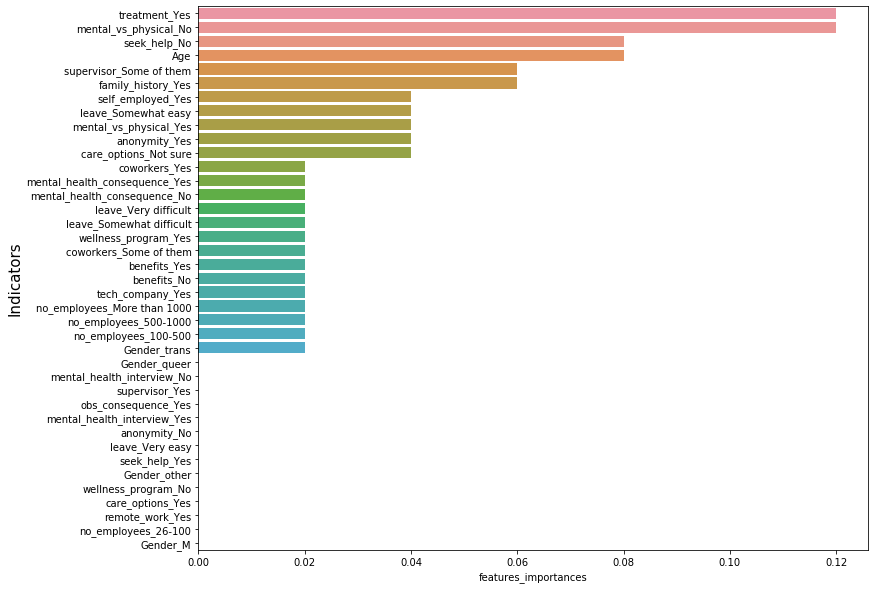

In [920]:
plt.figure(figsize=(12, 10))
sns.barplot(boost_df.features_importances, boost_df.features)
plt.ylabel('Indicators', fontsize=15)

In [921]:
pred = boost_model.predict(X_test)


In [922]:
boost_model.score(X_sampled, y_sampled)

0.7803347280334728

In [923]:
boost_pred = boost_model.predict(X_test)

In [924]:
accuracy_score(y_test, boost_pred)*100 

69.38775510204081